In [100]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import keras
import tensorflow as tf
import os
import random

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# CONSTANT
EVAL_DATA_DIR = "../data/evaluation/data-evaluation2.npy"
MODEL_PATH = "../models/modelCNN2.h5"
HISTORY_MODEL_PATH = "../data/evaluation/model-history2.npy"
HISTORY_MODEL_PATH = "../data/evaluation/history-model.pkl"
IMAGE_SIZE = (128, 128)
DATA_DIR = "../data/motif-sasirangan-v2"

In [3]:
def to_dataframe(data_dir):
    img_class_list = os.listdir(data_dir)
    img_path_list = []
    category_list = []
    print(img_class_list)
    for img_class in img_class_list:
        for img in os.listdir(os.path.join(data_dir, img_class)):
            img_path = os.path.join(data_dir, img_class, img) 
            category_list.append(img_class)
            img_path_list.append(img_path)

    df = pd.DataFrame({
        'file_path': img_path_list,
        'category': category_list
    })

    return df

In [43]:
img_df = to_dataframe(DATA_DIR)
img_df

['Kulat Karikit', 'Naga Balimbur', 'Turun Dayang', 'Iris Pudak', 'Bayam Raja']


,file_path,category
0,../data/motif-sasirangan-v2/Kulat Karikit/Pics...,Kulat Karikit
1,../data/motif-sasirangan-v2/Kulat Karikit/Pics...,Kulat Karikit
2,../data/motif-sasirangan-v2/Kulat Karikit/Pics...,Kulat Karikit
3,../data/motif-sasirangan-v2/Kulat Karikit/Pics...,Kulat Karikit
4,../data/motif-sasirangan-v2/Kulat Karikit/Pics...,Kulat Karikit
...,...,...
120,../data/motif-sasirangan-v2/Bayam Raja/Picsart...,Bayam Raja
121,../data/motif-sasirangan-v2/Bayam Raja/Picsart...,Bayam Raja
122,../data/motif-sasirangan-v2/Bayam Raja/Picsart...,Bayam Raja
123,../data/motif-sasirangan-v2/Bayam Raja/Picsart...,Bayam Raja


In [5]:
img_df['category'].unique()

array(['Kulat Karikit', 'Naga Balimbur', 'Turun Dayang', 'Iris Pudak',
       'Bayam Raja'], dtype=object)

## Classification Reports

In [6]:
def load_eval_data(eval_data_dir=EVAL_DATA_DIR):
    with open(EVAL_DATA_DIR, 'rb') as f:
        train_data = np.load(f)
        train_labels = np.load(f)
        val_data = np.load(f)
        val_labels = np.load(f)

    return train_data, train_labels, val_data, val_labels

In [7]:
# Read dictionary pkl file
with open(HISTORY_MODEL_PATH, 'rb') as fp:
    history_model = pickle.load(fp)

In [8]:
train_data, train_labels, val_data, val_labels = load_eval_data()

### History Per Epochs

In [9]:
def plot_history_model(df:pd.DataFrame, metric: str):
    # set the font size for the legend and label text
    mpl.rcParams['legend.fontsize'] = 8
    mpl.rcParams['axes.labelsize'] = 10
    mpl.rcParams['xtick.labelsize'] = 8
    mpl.rcParams['ytick.labelsize'] = 8
    
    sns.lineplot(data=history_model_df[metric], label=f'Training {metric}')
    sns.lineplot(data=history_model_df[f'val_{metric}'], label=f'Validation {metric}')
    plt.xlabel('epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    sns.set_theme(palette="pastel")
    plt.show()

In [10]:
history_model_df = pd.DataFrame(history_model)
history_model_df.tail()

,loss,acc,auc,precision,recall,val_loss,val_acc,val_auc,val_precision,val_recall
173,0.216978,0.939394,0.996659,0.939394,0.939394,1.357062,0.76,0.9516,0.782609,0.72
174,0.233544,0.949495,0.995689,0.949495,0.949495,1.632652,0.80,0.9490,0.826087,0.76
175,0.180720,0.959596,0.998980,0.959596,0.959596,1.857766,0.76,0.9436,0.750000,0.72
176,0.224768,0.939394,0.996952,0.948980,0.939394,1.618195,0.84,0.9558,0.869565,0.80
177,0.216545,0.939394,0.997296,0.939394,0.939394,1.410338,0.88,0.9630,0.904762,0.76


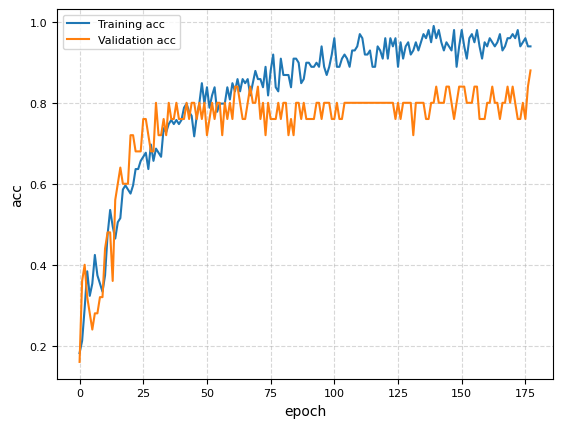

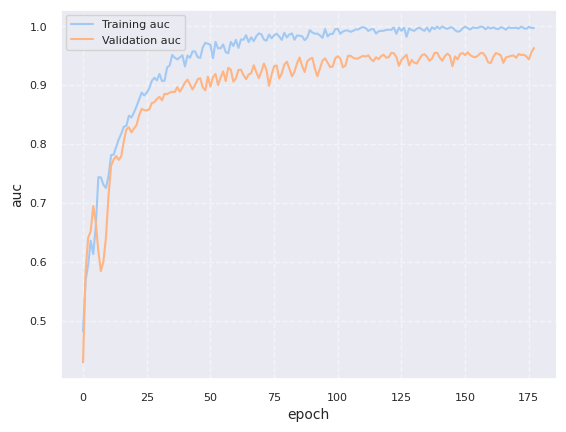

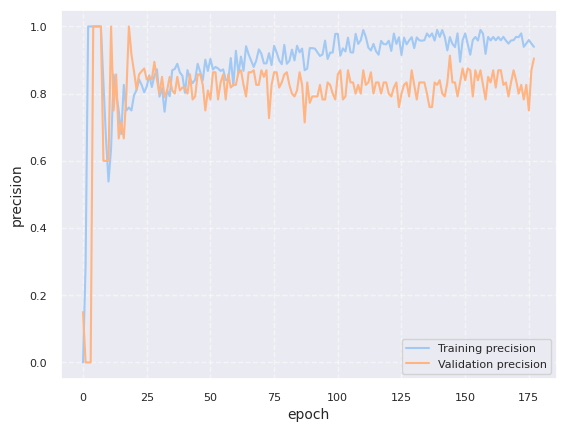

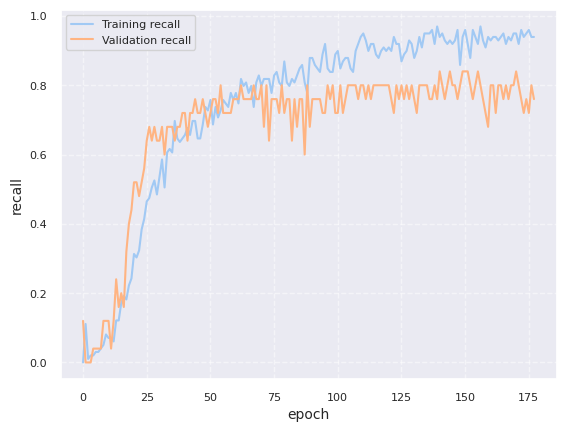

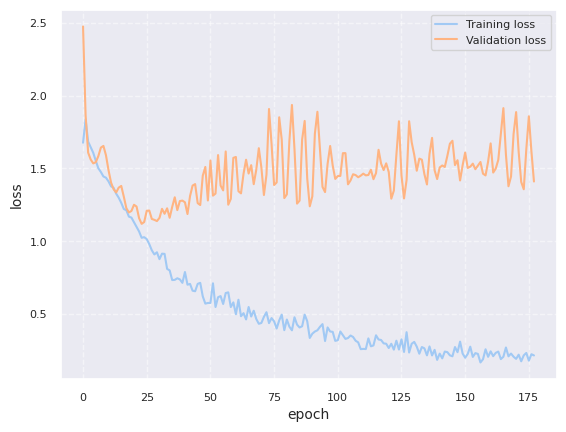

In [11]:
metrics = ['acc', 'auc', 'precision', 'recall', 'loss']

for metric in metrics:
    plot_history_model(history_model_df, metric)

### Evaluation Final Results

In [99]:
model = load_model(MODEL_PATH)

In [13]:
train_scores = model.evaluate(train_data, train_labels)
val_scores = model.evaluate(val_data, val_labels)

1/1 [==============================] - 0s 102ms/step - loss: 1.4103 - acc: 0.8800 - auc: 0.9630 - precision: 0.9048 - recall: 0.7600


In [14]:
history_model_df.tail()

,loss,acc,auc,precision,recall,val_loss,val_acc,val_auc,val_precision,val_recall
173,0.216978,0.939394,0.996659,0.939394,0.939394,1.357062,0.76,0.9516,0.782609,0.72
174,0.233544,0.949495,0.995689,0.949495,0.949495,1.632652,0.80,0.9490,0.826087,0.76
175,0.180720,0.959596,0.998980,0.959596,0.959596,1.857766,0.76,0.9436,0.750000,0.72
176,0.224768,0.939394,0.996952,0.948980,0.939394,1.618195,0.84,0.9558,0.869565,0.80
177,0.216545,0.939394,0.997296,0.939394,0.939394,1.410338,0.88,0.9630,0.904762,0.76


#### Summary

the following are the final result for each metrics:
- accuracy (training): 0.939394
- accuracy (validation): 0.88

- recall(training): 0.939394
- recall(validation): 0.76

- precision(training): 0.939394
- precision(validation): 0.904762	

- AUC(training): 0.997296	
- AUC(validation): 0.9630	

(Categorical loss entropy)
- loss(training): 0.216545
- loss(validation): 1.410338	

## Prediction Test

In [94]:
class_dict = { 0:"Bayam Raja", 1:"Iris Pudak", 2:"Kulat Karikit", 3:"Naga Balimbur", 4:"Turun Dayang"}
class_dict

{0: 'Bayam Raja',
 1: 'Iris Pudak',
 2: 'Kulat Karikit',
 3: 'Naga Balimbur',
 4: 'Turun Dayang'}

In [95]:
img_path = img_df['file_path']

In [96]:
label_img

'Kulat Karikit'

In [97]:
n = 6
rand_arr = [random.randint(0, len(img_df)) for _ in range(n)]
rand_arr[0] = 100 # salah predict

1/1 [==============================] - 0s 21ms/step


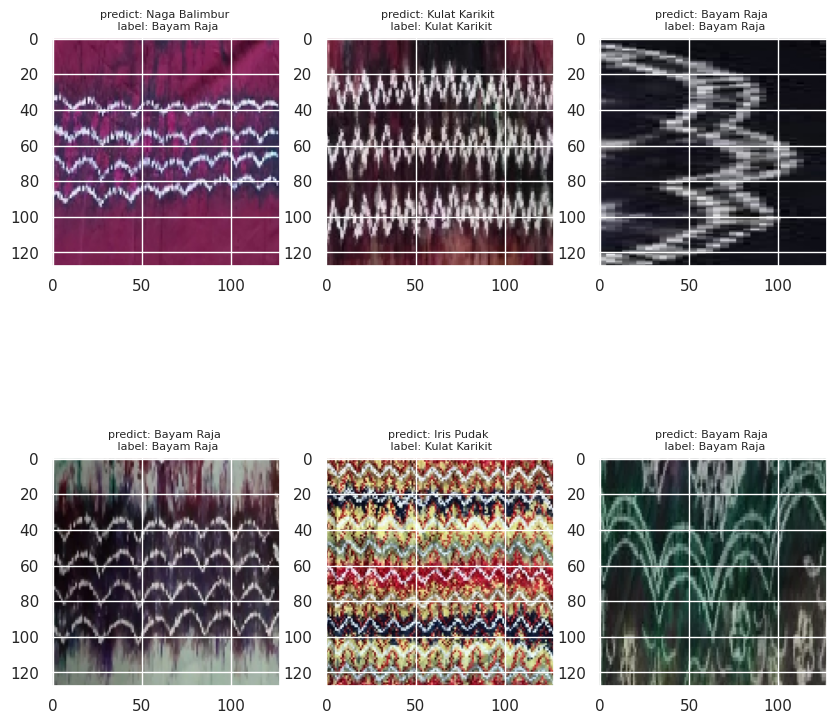

In [98]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
axs = axs.ravel()
i = 0
for index in rand_arr:
    img_path = img_df['file_path'][index]
    label_img = img_df['category'][index]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
    # convert the image to a NumPy array and scale its values to be between 0 and 1
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.
    axs[i].imshow(img_array)
#     axs[i].axis('off')
    # add a batch dimension to the array and predict the label using the pre-trained model
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    predicted_class = class_dict[np.argmax(pred, axis=1)[0]]
    axs[i].set_title(f"predict: {predicted_class} \n label: {label_img}" , fontsize=8)
    i += 1